# Importações

In [114]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

### Pegando Dados

In [115]:
url = 'https://raw.githubusercontent.com/MarcospsDonizete/Mat-inteligencia-Artificial/main/data/emprestimo.csv'
df = pd.read_csv(url, delimiter=',', error_bad_lines=False)
df.head() 

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim


## Tranformação em Classes

In [116]:
df['empresta'],class_names = pd.factorize(df['empresta']) # Não=0; Sim=1
print(class_names)
print(df['empresta'].unique())

Index(['Nao', 'Sim'], dtype='object')
[0 1]


In [117]:
df['montante'],_ = pd.factorize(df['montante']) # Médio=0; Baixo=1; Alto=2
print(df['montante'].unique())

[0 1 2]


In [118]:
df['idade'],_ = pd.factorize(df['idade']) # Senior=0; Média=1; Jovem=2
print(df['idade'].unique())

[0 1 2]


In [119]:
df['salario'],_ = pd.factorize(df['salario']) # Baixo=0; Alto=1
print(df['salario'].unique())

[0 1]


In [120]:
df['tem_conta'],_ = pd.factorize(df['tem_conta']) # Sim=0; Não=1
print(df['tem_conta'].unique())

[0 1]


### Resultante

In [121]:
df

,montante,idade,salario,tem_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   montante   14 non-null     int64
 1   idade      14 non-null     int64
 2   salario    14 non-null     int64
 3   tem_conta  14 non-null     int64
 4   empresta   14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


### Treinamento 

In [123]:
feature_cols = ['montante','idade','salario','tem_conta']
X_train = df[feature_cols]   # Features (conj. dados)

In [124]:
y_train = df.empresta  # Target variable (conj. dados)

In [125]:
X_train.columns   # nomes das colunas features para treinamento
df.columns[4]     # nome da coluna targer para treinamento

'empresta'

In [126]:
# constrói o modelo usando critério “Entropia”
clf = DecisionTreeClassifier(criterion='entropy')

In [127]:
clf = clf.fit(X_train,y_train)

In [128]:
# mostra modelo processado
clf

DecisionTreeClassifier(criterion='entropy')

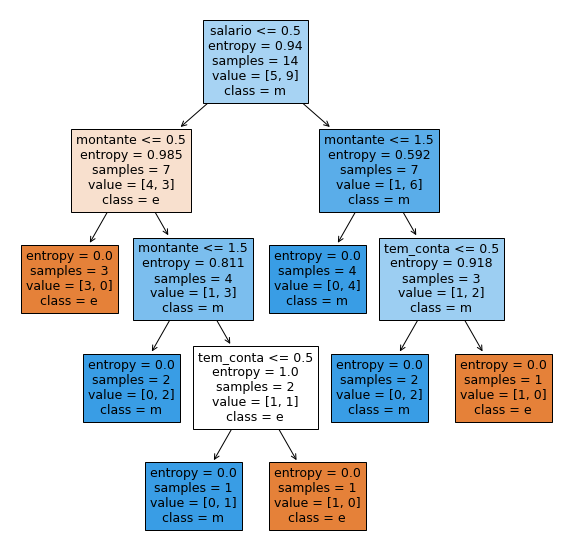

In [129]:
# mostra a árvore
fig1 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig1.savefig("fig1.png")

### Abordagem e Decisão

In [130]:
feature_cols = ['montante','idade','salario','tem_conta']
X_train = df[feature_cols]  

In [131]:
y_train = df.empresta

In [132]:
# Separação de dados para Treinamento (train) e Testes (test); Variáveis X são as colunas features e Variáveis Y trata-se da coluna target
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [133]:
# Visualização dos dados de Treinamento e Testes, já separados
X_train
X_test

,montante,idade,salario,tem_conta
3,2,1,0,0
7,0,1,0,0
6,1,2,1,1
2,1,0,0,0
10,0,1,1,1


In [134]:
# constrói o modelo usando critério “Entropia”
clf = DecisionTreeClassifier(criterion='entropy')

In [135]:
# mostra modelo processado
clf = clf.fit(X_train,y_train)

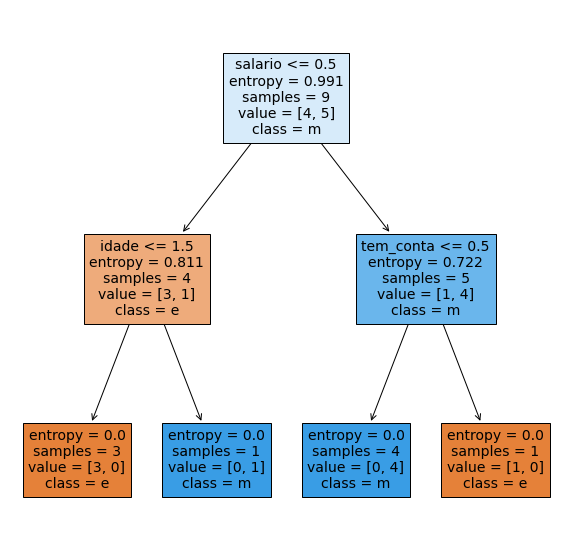

In [136]:
# mostra a árvore
fig2 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig2.savefig("fig2.png")

In [137]:
# uso do modelo para fazer predições (classificações) com os dados de testes
y_pred = clf.predict(X_test)

Para saber como o nosso modelo permofou é necessário importar a seguinte biblioteca:

In [138]:
count_misclassified = (y_test != y_pred).sum()
print('Amostras erroneamente classificadas: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Acuracia: {:.2f}'.format(accuracy))

Amostras erroneamente classificadas: 4
Acuracia: 0.20


Para testar uma amostra específica é necessário importar a seguinte bibloteca:

In [139]:
# Para a Entrada montante=1 ; idade=0; salario=1; tem_conta=0
# Qual a classe (saída)?
W_test = np.array ([[1, 0, 1, 0]]) 
y_pred = clf.predict(W_test)
y_pred
# Resposta: 1 (Yes) -

c:\users\sergi\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)